# Deep Learning with Python

## 5.2 Training a convnet from scratch on a small dataset

> 在小型数据集上从头训练一个卷积神经网络

我们搞计算机视觉的时候，经常要处理的问题就是在很小的数据集上训练一个图像分类的模型。emmm，这里的“很小”可以是几百到几万。

从这一节开始到后面几节，我们要搞的就是从头开始训练一个小型模型、使用预训练的网络做特征提取、对预训练的网络进行微调，这些步骤合起来就可以用于解决小型数据集的图像分类问题了。

我们这一节要做的是从头开始训练一个小型模型来分类猫狗的图片。不做正则化，先不管过拟合的问题。


### 下载数据

我们将使用 Dogs vs. Cats dataset 来训练模型，这个数据集里面是一大堆猫、狗的照片。这个数据集就不是 Keras 内置的了，我们可以从 Kaggle 下载：[https://www.kaggle.com/c/dogs-vs-cats/data](https://www.kaggle.com/c/dogs-vs-cats/data)

下载下来解压缩，，，（emmmm有点大我的 MBP 都装不下了，放移动硬盘上才解出来的😂，emmmm，又想起来该买个新固态了）。

然后来创建我们要用的数据集：训练集猫狗各1000个样本，验证集各500个，测试集各500个。编程来完成这个工作：

In [1]:
# 将图像复制到训练、验证和测试的目录
import os, shutil

original_dataset_dir = '/Volumes/WD/Files/dataset/dogs-vs-cats/dogs-vs-cats/train'    # 原始数据集

base_dir = '/Volumes/WD/Files/dataset/dogs-vs-cats/cats_and_dogs_small'    # 将要保存的较小数据集的位置
os.mkdir(base_dir)


# 创几个目录放划分后的训练、验证和测试集
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 分开放猫狗
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 复制猫的图片
fnames = [f'cat.{i}.jpg' for i in range(1000)]    # 这里用了 f-String，要求 Python >= 3.6，老版本可以用 'cat.{}.jpg'.format(i)
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 复制狗的图片
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 检查
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500
total training dog images: 1000
total validation dog images: 500
total test dog images: 500


### 构建网络

在几乎所有的卷积神经网络里，我们都是让特征图的深度逐渐增大，而尺寸逐渐减小。所以这次我们也是这样的。

我们现在的这个问题是个二分类，所以最后一层用一个1单元的 sigmoid 激活的 Dense：

In [39]:
# 将猫狗分类的小型卷积神经网络实例化

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

看一下网络的结构：

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

然后就要编译这个网络了，做二分类嘛，所以损失函数用 binary crossentropy（二元交叉熵），优化器还是用 RMSprop (我们之前都是写 `optimizer='rmsprop'`，这次要传点参数，所以用 `optimizers.RMSprop` 实例)：

In [41]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### 数据预处理

我们要把那些图片搞成浮点数张量才能喂给神经网络。步骤如下：

1. 读取图片文件
2. 把 JPEG 文件内容解码成 RGB 像素网格
3. 转化成浮点数张量
4. 把像素的值从 `[0, 255]` 缩放到 `[0, 1]`

Keras 提供了一些工具可以自动完成这些：

In [42]:
# 使用 ImageDataGenerator 从目录中读取图像

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')    # 用二分类的标签

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


这个搞出来的 train_generator 和 validation_generator 就是 Python 的那种 Generator，惰性计算的那种。这个生成器一次 yield 出来一个 batch，所以把它叫做“batch generator”，迭代出一个来看一下：

In [43]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print('labels_batch:', labels_batch)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
labels_batch: [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.]


In [44]:
# 利用 batch 生成器拟合模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 97s 967ms/step - loss: 0.6901 - acc: 0.5450 - val_loss: 0.6785 - val_acc: 0.5270
Epoch 2/30
100/100 [==============================] - 86s 865ms/step - loss: 0.6661 - acc: 0.5875 - val_loss: 0.6525 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.6344 - acc: 0.6405 - val_loss: 0.6360 - val_acc: 0.6450
Epoch 4/30
100/100 [==============================] - 122s 1s/step - loss: 0.5856 - acc: 0.6905 - val_loss: 0.6407 - val_acc: 0.6170
Epoch 5/30
100/100 [==============================] - 113s 1s/step - loss: 0.5503 - acc: 0.7160 - val_loss: 0.6254 - val_acc: 0.6530
Epoch 6/30
100/100 [==============================] - 86s 858ms/step - loss: 0.5258 - acc: 0.7495 - val_loss: 0.6445 - val_acc: 0.6410
Epoch 7/30
100/100 [==============================] - 117s 1s/step - loss: 0.4907 - acc: 0.7550 - val_loss: 0.5918 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 132s 1s/s

这里因为是从 generator 读取 batch 来 fit，所以把我们平时用的 fit 改成了 `fit_generator`。里面传训练数据生成器、一个轮次要从 train_generator 里 yield 出来的次数(steps_per_epoch)、轮次、验证集生成器、一个轮次要从 validation_generator 里 yield 出来的次数(validation_steps)。

```
steps_per_epoch = 训练集数据总数 / 构建generator时指定的batch_size
```

validation_steps 和 steps_per_epoch 类似，只是是对验证集的。

用下面这行代码把训练好的模型保存下来：

In [45]:
# 保存模型
model.save('/Volumes/WD/Files/dataset/dogs-vs-cats/cats_and_dogs_small_1.h5')

然后把训练过程画出图来看一下：

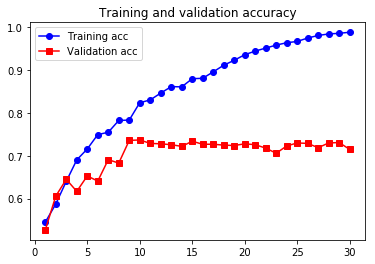

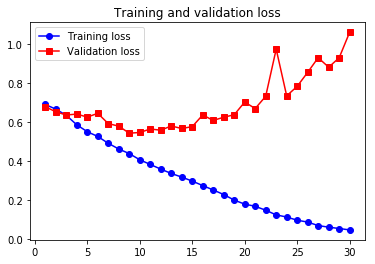

In [46]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'sr-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'sr-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

不出所料，过拟合了，从差不多第5轮就开始过了。

接下来，我们要用 data augmentation (数据增强) 来降低过拟合。

### 数据增强

data augmentation (数据增强) 是用深度学习处理图像一般都会用到的一个方法。

过拟合是由于训练的数据太少导致的（只要样本足够多，模型就能看遍几乎所以可能，从而几乎不会犯错）。数据增强是一种以现有的样本为基础生成更多的训练数据的一种方法，这个方法利用多种能够生成可信图像的随机变换来增加。

在 Keras 中，我们用 ImageDataGenerator 的时候设几个参数就可以完成数据增强了：

In [47]:
datagen = ImageDataGenerator(
      rotation_range=40,      # 随机旋转图片的范围，0~180
      width_shift_range=0.2,  # 随机水平移动的比例
      height_shift_range=0.2, # 随机竖直移动的比例
      shear_range=0.2,        # 随机错切变换(shearing transformations)的角度
      zoom_range=0.2,         # 随机缩放的范围
      horizontal_flip=True,   # 是否做随机水平反转
      fill_mode='nearest')    # 填充新创建像素的方法

找张图片增强了试试：

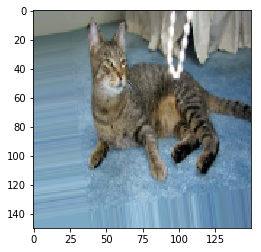

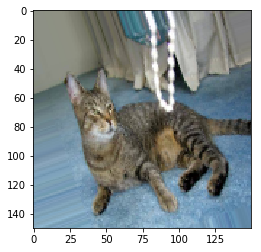

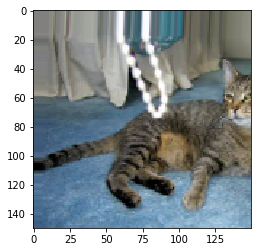

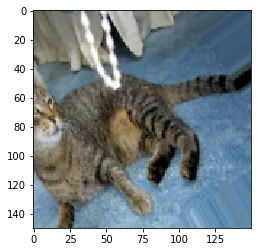

In [49]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))    # 读取图片

x = image.img_to_array(img)    # shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # shape (1, 150, 150, 3)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

注意数据增强并没有带来新的信息，只是把原本就有的信息 remix 一下。所以在数据特别少的情况下，光用数据增强不足以消除过拟合，所以我们还需要在 Dense 层之前用上 Dropout。

In [51]:
# 定义一个包含 dropout 的新卷积神经网络

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))    # 👈 新增的 Dropout

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [52]:
# 利用数据增强生成器来训练卷积神经网络

# 数据生成器
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)    # 测试集不增强哦

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# 训练
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

# 保存模型
model.save('/Volumes/WD/Files/dataset/dogs-vs-cats/cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 142s 1s/step - loss: 0.6909 - acc: 0.5265 - val_loss: 0.6799 - val_acc: 0.5127
Epoch 2/100
100/100 [==============================] - 123s 1s/step - loss: 0.6817 - acc: 0.5474 - val_loss: 0.6561 - val_acc: 0.6320
Epoch 3/100
100/100 [==============================] - 127s 1s/step - loss: 0.6652 - acc: 0.5896 - val_loss: 0.7169 - val_acc: 0.5152
Epoch 4/100
100/100 [==============================] - 144s 1s/step - loss: 0.6425 - acc: 0.6244 - val_loss: 0.6010 - val_acc: 0.6815
Epoch 5/100
100/100 [==============================] - 136s 1s/step - loss: 0.6265 - acc: 0.6394 - val_loss: 0.6220 - val_acc: 0.6428
Epoch 6/100
100/100 [==============================] - 155s 2s/step - loss: 0.6165 - acc: 0.6539 - val_loss: 0.5862 - val_acc: 0.6745
Epoch 7/100
100/100 [==============================] - 142s 1s/step - loss: 0.5997 - acc: 0.6761 - val_loss: 0.5

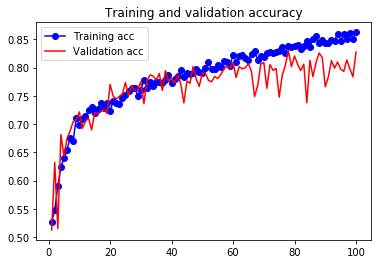

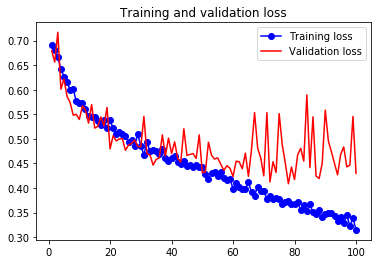

In [54]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

👌用了 Data Augmentation 和 Dropout 之后，过拟合就好多了，精度也有所提升。

接下来，我们还会用一些技术来进一步优化模型。